**TASK 1**

**QUESTION 1** Use torch.autograd to find the true gradient on the above dataset using linear regression for given values of (theta0, theta1 ).

**IMPORTING LIBRARY**

In [271]:
import numpy as np 
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random
%matplotlib notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

**LOADING THE DATA**

In [272]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)#this is vector of 40 random numbers
y = f_x + eps
print(x1.shape,y.shape) #these are 1D arrays
print(x1,y)

(40,) (40,)
[ 0.97802303  0.09908945 -0.4371054  -0.84542087 -0.11106101 -0.05438406
 -0.902956   -0.6733511  -0.76809858  0.25478337  0.7123641   0.30020484
  0.98144337 -0.0592985   0.23658897 -0.43466559  0.95200663  0.346136
 -0.11893822 -0.42062532  0.01939937 -0.77507821 -0.54609042 -0.04289539
 -0.51448369 -0.22403496  0.63774686 -0.85091843  0.84629908 -0.55020784
  0.41274297 -0.77886909  0.20200825 -0.18641492  0.6736589  -0.49993914
 -0.08452402  0.11486541 -0.4960996  -0.77951736] [6.0030427  5.40825442 2.49900085 2.74214699 3.11273986 4.19115056
 0.85085583 1.55549786 1.92378589 5.34339426 5.28290394 4.05927419
 6.288626   3.67522179 3.2977914  2.42544641 7.9853232  3.69814992
 3.3938893  4.50161625 3.46623868 0.76695369 2.63352835 3.86675216
 3.31065588 1.73789022 5.96928955 1.55310728 6.44805966 1.63550044
 5.4419443  2.86642458 4.69033781 3.60468915 6.39472825 2.27327572
 3.07515354 4.6587061  3.99611931 2.31361209]


In [273]:
# Convert to PyTorch tensors
x1_tensor = torch.tensor(x1,  requires_grad=True).view(-1, 1)
y_tensor = torch.tensor(y).view(-1, 1)

# Define the model parameters
theta_0 = torch.tensor(0.0,  requires_grad=True)
theta_1 = torch.tensor(0.0,  requires_grad=True)

# Linear model
def model(x):
    return theta_1 * x + theta_0

# Define the loss function (Mean Squared Error)
def loss_fn(pred, target):
    return ((pred - target) ** 2).mean()

# Compute predictions
y_pred = model(x1_tensor)

# Compute the loss
loss = loss_fn(y_pred, y_tensor)

# Compute gradients
loss.backward()

# Print True gradients
print(f"True Gradient of theta_0: {theta_0.grad}") #.grad function is storing the gradients of the loss w.r.t. theta_0
print(f"True Gradient of theta_1: {theta_1.grad}")


True Gradient of theta_0: -7.447053909301758
True Gradient of theta_1: -1.0253016948699951


**QUESTION 2** Using the same values of theta0 and theta1 as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient. 

**CALCULATING THE TRUE GRADIENT**

In [274]:
# Convert to PyTorch tensors
x1_tensor = torch.tensor(x1, requires_grad=True).view(-1, 1)
y_tensor = torch.tensor(y).view(-1, 1)

# Define the model parameters
theta_0 = torch.tensor(0.0,  requires_grad=True)
theta_1 = torch.tensor(0.0,  requires_grad=True)

# Linear model
def model(x):
    return theta_1 * x + theta_0

# Define the loss function (Mean Squared Error)
def loss_fn(pred, target):
    return ((pred - target) ** 2).mean()

# Compute predictions
y_pred = model(x1_tensor)

# Compute the loss
loss = loss_fn(y_pred, y_tensor)

# Compute gradients
loss.backward()

# Print True gradients
print(f"True Gradient of theta_0: {theta_0.grad}") #.grad function is storing the gradients of the loss w.r.t. theta_0
print(f"True Gradient of theta_1: {theta_1.grad}")


True Gradient of theta_0: -7.447053909301758
True Gradient of theta_1: -1.0253016948699951


**CALCULATING THE AVG. STOCHASTIC GRADIENT**

In [246]:
# Initialize variables to store the sum of gradients
theta_0_grad_sum = 0
theta_1_grad_sum = 0

# Loop through each data point to calculate stochastic gradients
for i in range(num_samples):
    # Zero out previous gradients
    theta_0.grad = None
    theta_1.grad = None

    # Get individual data point
    x_i = x1_tensor[i]
    y_i = y_tensor[i]

    # Forward pass for this data point
    y_pred = model(x_i)

    # Compute the loss for this data point
    loss = loss_fn(y_pred, y_i)

    # Backward pass to compute gradients
    loss.backward()

    # Accumulate the gradients
    theta_0_grad_sum += theta_0.grad
    theta_1_grad_sum += theta_1.grad

# Compute the average gradients (stochastic gradient)
theta_0_avg_grad = theta_0_grad_sum / num_samples
theta_1_avg_grad = theta_1_grad_sum / num_samples

# Print average stochastic gradients
print(f"Average Stochastic Gradient of theta_0: {theta_0_avg_grad}")
print(f"Average Stochastic Gradient of theta_1: {theta_1_avg_grad}")

Average Stochastic Gradient of theta_0: -7.447054386138916
Average Stochastic Gradient of theta_1: -1.0253016948699951


As we can see, that the values we are getting by average stochastic gradient is same as the values of true gradient. So, we can conclude that stochastic gradient is a good etimate of true gradient.

**From both the values we are getting, we can say that stochastic gradient is a good estimate of true gradient.**

**question 3** Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of 
ϵ
 (or 
ϵ
-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose 
ϵ = 0.001
 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods

**Full-Batch gradient descent**

In [275]:
#Full batch gradient descent
def full_batch_gradient_descent(x1,y,epochs,learning_rate, epsilon):
    prev_loss = 0
    loss_FGD=[]
    diff_FGD=[]
    theta_0_history=[]
    theta_1_history=[]
    #initializing the parameters
    theta_0= 0.0
    theta_1= 0.0
    
    for i in range(epochs):
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        #calculating the predicted value
        y_hat = theta_0 + theta_1 * x1
        
        #calculating the loss
        loss = np.sum((y-y_hat)**2) / len(x1)
        loss_FGD.append(loss)
        diff_FGD.append(abs(prev_loss - loss))

        #calculating the gradients
        grad_theta_0 = np.sum(-2*(y - y_hat)) / len(x1)
        grad_theta_1 = np.sum(-2*(y - y_hat)*x1) / len(x1)

        #updating the parameters
        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1
        
        #To check whether it is converging or not 
        if (abs(prev_loss - loss) < epsilon):
            print(f'Gradient Descent Converged at Epoch {i+1}')
            break
        prev_loss = loss

    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    print(f'Loss is {loss}')
    return loss_FGD, diff_FGD, theta_0_history, theta_1_history

# Train model
loss_FBGD, diff_FBGD, theta_0_history, theta_1_history = full_batch_gradient_descent(x1, y, 50,0.1, 0.001)

Gradient Descent Converged at Epoch 49
Theta_0 is 3.933339722027752 and Theta_1 is 2.54052434288955 at epoch 49
Loss is 0.6028415586376863


**Plot for loss V/s epochs**

Gradient Descent Converged at Epoch 49
Theta_0 is 3.933339722027752 and Theta_1 is 2.54052434288955 at epoch 49
Loss is 0.6028415586376863


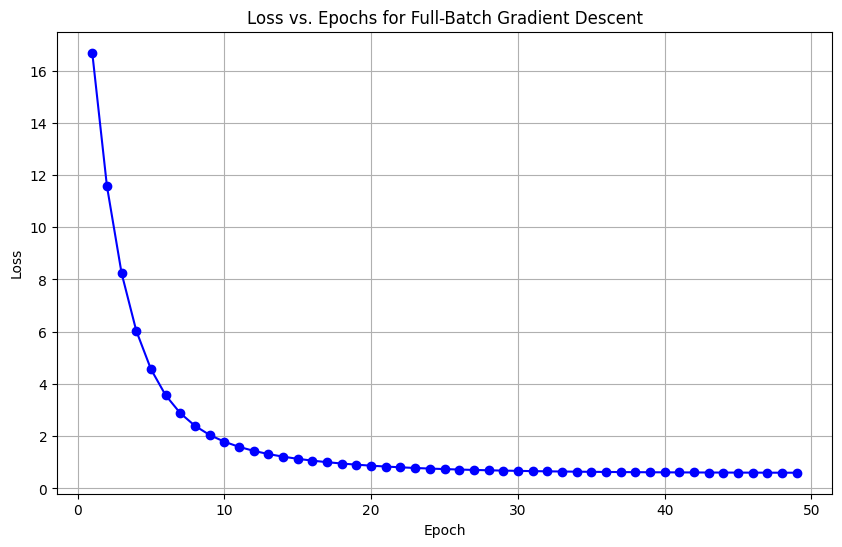

In [277]:
# Train model
loss_FBGD, diff_FBGD,  theta_0_history, theta_1_history = full_batch_gradient_descent(x1, y, 50,0.1, 0.001)

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(loss_FBGD)+1), loss_FBGD, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Full-Batch Gradient Descent')
plt.grid(True)
plt.show()


Gradient Descent Converged at Epoch 297
Theta_0 is 3.88081002811426 and Theta_1 is 2.178469907817837 at epoch 297
Loss is 0.675879759727649


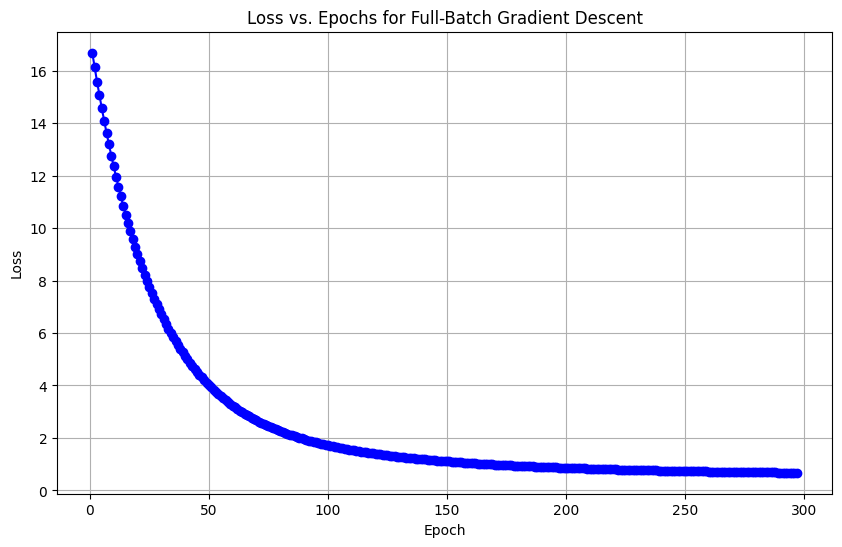

In [278]:
# Train model
loss_FBGD, diff_FBGD,  theta_0_history, theta_1_history = full_batch_gradient_descent(x1, y, 300,0.01, 0.001)

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(loss_FBGD)+1), loss_FBGD, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Full-Batch Gradient Descent')
plt.grid(True)
plt.show()


**Visualize the convergence process for 15 epochs.**

Theta_0 is 3.6821866456093724 and Theta_1 is 1.4862484612593803 at epoch 15
Loss is 1.1350532884583349


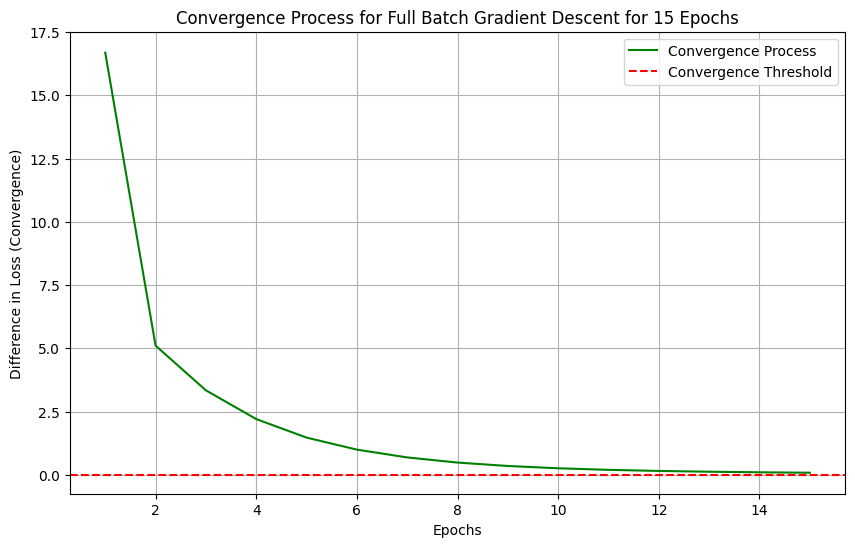

In [281]:
# Running the full batch gradient descent for 15 epochs
epochs = 15
learning_rate = 0.1
epsilon = 0.001
loss_FGD, diff_FGD, theta_0_history, theta_1_history= full_batch_gradient_descent(x1, y, epochs, learning_rate, epsilon)

# Plotting Convergence Process vs. Epochs
plt.figure(figsize=(10,6))
plt.plot(range(1,len(diff_FGD)+1), diff_FGD, label='Convergence Process', color='green')
plt.xlabel('Epochs')
plt.ylabel('Difference in Loss (Convergence)')
plt.title('Convergence Process for Full Batch Gradient Descent for 15 Epochs')
plt.axhline(y=0.001, color='red', linestyle='--', label='Convergence Threshold') #the convergence threshold is 0.001. that is added to visualize the stopping criteria
plt.grid(True)
plt.legend()
plt.show()

**Show the contour plots for different epochs for visualisation of optimisation process.**

Gradient Descent Converged at Epoch 49
Theta_0 is 3.933339722027752 and Theta_1 is 2.54052434288955 at epoch 49
Loss is 0.6028415586376863


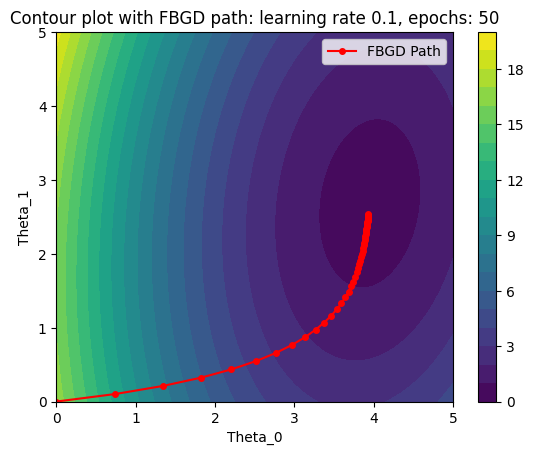

In [282]:
#plotting the contour plot for full batch gradient descent
def contour_plot_full_batch(x1, y, t0lim, t1lim, epochs, learning_rate, theta0_history, theta1_history):
    
    # Create meshgrid for theta0 and theta1 values
    theta0 = np.linspace(t0lim[0], t0lim[1], 100)
    theta1 = np.linspace(t1lim[0], t1lim[1], 100)
    t0, t1 = np.meshgrid(theta0, theta1)
    
    # Flatten x1 and y for broadcasting
    x1_flat = x1[np.newaxis, np.newaxis, :]
    y_flat = y[np.newaxis, np.newaxis, :]
    broadcasted_t1 = t1[:, :, np.newaxis]
    broadcasted_t0 = t0[:, :, np.newaxis]
    
    # Compute the predicted y values and the loss (MSE) across the meshgrid
    y_pred = broadcasted_t0 + broadcasted_t1 * x1_flat
    z = np.mean((y_flat - y_pred)**2, axis=-1)

    # Plot the contour
    fig, ax = plt.subplots()
    contour = ax.contourf(t0, t1, z, levels=20)
    plt.colorbar(contour)
    plt.xlabel('Theta_0')
    plt.ylabel('Theta_1')
    plt.title(f'Contour plot with FBGD path: learning rate {learning_rate}, epochs: {epochs}')
    
    # Plot the FBGD path
    path = np.array([theta0_history, theta1_history]).T
    ax.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='FBGD Path')
    plt.legend()
    plt.show()
    
t0lim = [0,5]
t1lim = [0,5]
less_FGD, diff_FGD, theta0_history, theta1_history = full_batch_gradient_descent(x1, y, 50, 0.1, 0.001)
contour_plot_full_batch(x1, y, t0lim ,t1lim , 50, 0.1, theta0_history, theta1_history)


Gradient Descent Converged at Epoch 297
Theta_0 is 3.88081002811426 and Theta_1 is 2.178469907817837 at epoch 297
Loss is 0.675879759727649


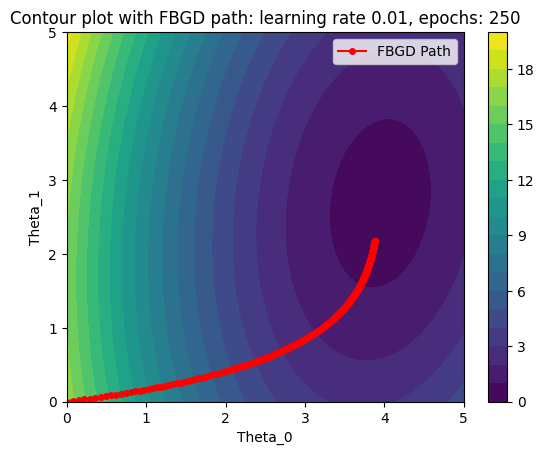

In [283]:
#plotting the contour plot for full batch gradient descent
def contour_plot_full_batch(x1, y, t0lim, t1lim, epochs, learning_rate, theta0_history, theta1_history):
    
    # Create meshgrid for theta0 and theta1 values
    theta0 = np.linspace(t0lim[0], t0lim[1], 100)
    theta1 = np.linspace(t1lim[0], t1lim[1], 100)
    t0, t1 = np.meshgrid(theta0, theta1)
    
    # Flatten x1 and y for broadcasting
    x1_flat = x1[np.newaxis, np.newaxis, :]
    y_flat = y[np.newaxis, np.newaxis, :]
    broadcasted_t1 = t1[:, :, np.newaxis]
    broadcasted_t0 = t0[:, :, np.newaxis]
    
    # Compute the predicted y values and the loss (MSE) across the meshgrid
    y_pred = broadcasted_t0 + broadcasted_t1 * x1_flat
    z = np.mean((y_flat - y_pred)**2, axis=-1)

    # Plot the contour
    fig, ax = plt.subplots()
    contour = ax.contourf(t0, t1, z, levels=20)
    plt.colorbar(contour)
    plt.xlabel('Theta_0')
    plt.ylabel('Theta_1')
    plt.title(f'Contour plot with FBGD path: learning rate {learning_rate}, epochs: {epochs}')
    
    # Plot the FBGD path
    path = np.array([theta0_history, theta1_history]).T
    ax.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='FBGD Path')
    plt.legend()
    plt.show()
    
t0lim = [0,5]
t1lim = [0,5]
less_FGD, diff_FGD, theta0_history, theta1_history = full_batch_gradient_descent(x1, y, 300, 0.01, 0.001)
contour_plot_full_batch(x1, y, t0lim ,t1lim , 250, 0.01, theta0_history, theta1_history)


**Mini-Batch Gradient Descent**

In [284]:
# Mini-Batch Gradient Descent Function
def mini_batch_gradient_descent(x1, y, epochs, learning_rate, epsilon, batch_size):
    prev_loss = float('inf')
    flag = False  # flag to check if convergence is achieved
    theta0_history=[]
    theta1_history=[]
    # Initializing the parameters
    theta_0 = 0.0
    theta_1 = 0.0
    loss_MBGD = []
    diff_MBGD = []
    total_iteration = 0
    
    n = len(x1)  # Number of data points
    num_batches = n // batch_size  # Number of batches per epoch
    
    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        idx = np.random.permutation(n)
        x1_shuffled = x1[idx]
        y_shuffled = y[idx]
        
        # Variable to accumulate loss over the epoch
        epoch_loss = 0
        
        # Iterate over mini-batches
        for b in range(num_batches):
            # Extract mini-batch data
            start_idx = b * batch_size
            end_idx = start_idx + batch_size
            x1_batch = x1_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            
            # Initialize gradients for the batch
            grad_theta_0_sum = 0
            grad_theta_1_sum = 0
            batch_loss = 0
            
            # Iterate over each point in the mini-batch
            for j in range(batch_size):
                
                total_iteration= epoch * num_batches + j
                # Calculating the predicted value for the current mini-batch point
                y_hat = theta_0 + theta_1 * x1_batch[j]
                
                # Calculating the loss for the current mini-batch point
                loss = (y_batch[j] - y_hat) ** 2
                batch_loss += loss
                
                # Calculating the gradients for the current mini-batch point
                grad_theta_0 = -2 * (y_batch[j] - y_hat)
                grad_theta_1 = -2 * (y_batch[j] - y_hat) * x1_batch[j]
                
                # Accumulating the gradients for the entire batch
                grad_theta_0_sum += grad_theta_0
                grad_theta_1_sum += grad_theta_1
            
            # Average gradients over the batch
            grad_theta_0_avg = grad_theta_0_sum / batch_size
            grad_theta_1_avg = grad_theta_1_sum / batch_size
            
            theta0_history.append(theta_0)
            theta1_history.append(theta_1)
            # Update parameters using average gradients
            theta_0 -= learning_rate * grad_theta_0_avg
            theta_1 -= learning_rate * grad_theta_1_avg

            # Accumulate batch loss
            epoch_loss += batch_loss
        
        # Average loss for this epoch
        average_epoch_loss = epoch_loss / n
        loss_MBGD.append(average_epoch_loss)
        diff_MBGD.append(abs(prev_loss - average_epoch_loss))
        
        # Check if convergence criterion is met
        if abs(prev_loss - average_epoch_loss) < epsilon:
            print(f'Mini-Batch GD Converged at epoch {epoch + 1} and total no. of iteration {total_iteration}')
            flag = True
            break  # Exit the epoch loop
        
        prev_loss = average_epoch_loss

    print(f'Theta_0: {theta_0}, Theta_1: {theta_1} at Epoch {epoch + 1}')
    print(f'Final Loss: {average_epoch_loss}')
    return loss_MBGD, diff_MBGD, theta0_history, theta1_history


**Plot for loss V/s epochs**

Mini-Batch GD Converged at epoch 12 and total no. of iteration 53
Theta_0: 3.9381778980919093, Theta_1: 2.5326600836156117 at Epoch 12
Final Loss: 0.621323967980788


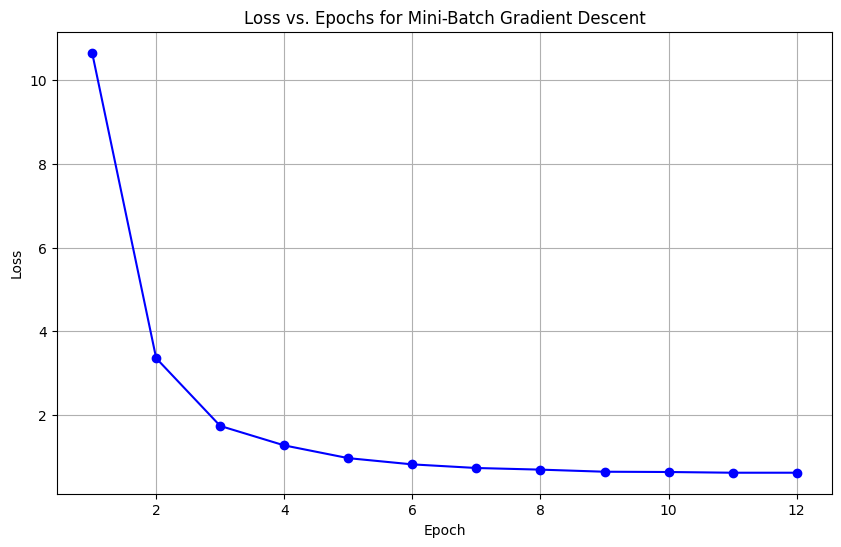

In [289]:
# Train Mini-Batch Gradient Descent model
batch_size = 10 # Batch size

loss_MBGD, diff_MBGD, theta0_history, theta1_history = mini_batch_gradient_descent(x1, y, 50, 0.1, 0.001, batch_size)

# Plot Loss vs. Epochs for Mini-Batch Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_MBGD)+1), loss_MBGD, marker='o', linestyle='-', color='Blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Mini-Batch Gradient Descent')
plt.grid(True)
plt.show()

Mini-Batch GD Converged at epoch 84 and total no. of iteration 341
Theta_0: 3.898845362070557, Theta_1: 2.285721622399301 at Epoch 84
Final Loss: 0.6497261457360114


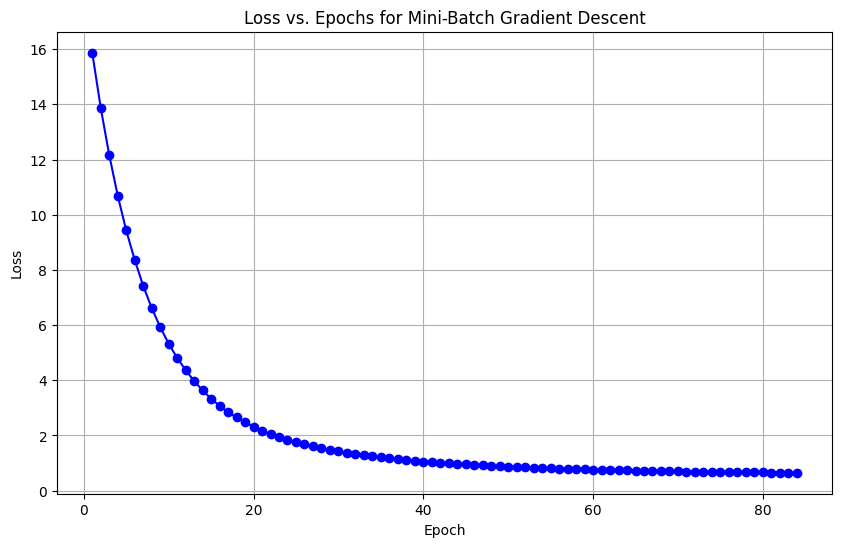

In [302]:
# Train Mini-Batch Gradient Descent model
batch_size = 10 # Batch size

loss_MBGD, diff_MBGD, theta0_history, theta1_history = mini_batch_gradient_descent(x1, y, 300, 0.01, 0.001, batch_size)

# Plot Loss vs. Epochs for Mini-Batch Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_MBGD)+1), loss_MBGD, marker='o', linestyle='-', color='Blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Mini-Batch Gradient Descent')
plt.grid(True)
plt.show()

**Visualize the convergence process for 15 epochs.**

Mini-Batch GD Converged at epoch 10 and total no. of iteration 45
Theta_0: 3.910103926053439, Theta_1: 2.452166119816938 at Epoch 10
Final Loss: 0.6493500538442984


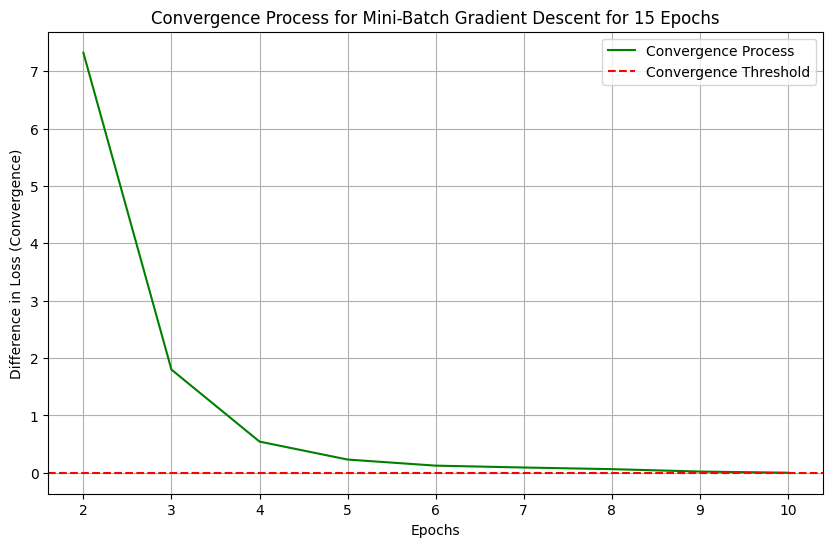

In [320]:
# Running the Mini-Batch Gradient Descent for 15 epochs
epochs = 15
learning_rate = 0.1
epsilon = 0.001
batch_size = 10  # Set the mini-batch size
loss_MBGD, diff_MBGD, theta0_history, theta1_history = mini_batch_gradient_descent(x1, y, epochs, learning_rate, epsilon, batch_size)

# Plotting Convergence Process vs. Epochs for Mini-Batch Gradient Descent
plt.figure(figsize=(10,6))
plt.plot(range(1, len(diff_MBGD)+1), diff_MBGD, label='Convergence Process', color='green')
plt.xlabel('Epochs')
plt.ylabel('Difference in Loss (Convergence)')
plt.title('Convergence Process for Mini-Batch Gradient Descent for 15 Epochs')
plt.axhline(y=0.001, color='red', linestyle='--', label='Convergence Threshold')  # Add convergence threshold for visualization
plt.grid(True)
plt.legend()
plt.show()

**Show the contour plots for different epochs for visualisation of optimisation process.**

Mini-Batch GD Converged at epoch 12 and total no. of iteration 53
Theta_0: 3.9355515440188467, Theta_1: 2.5492788245609423 at Epoch 12
Final Loss: 0.6135532917521479


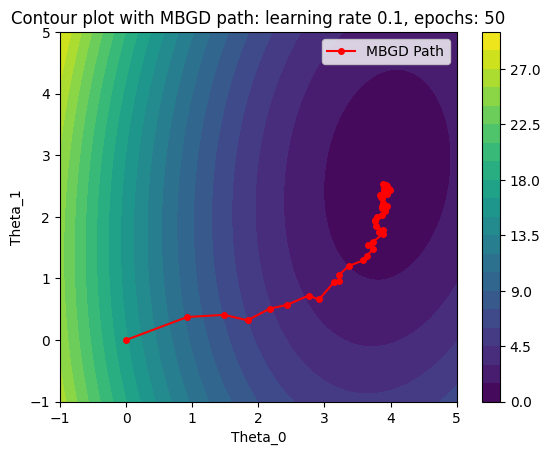

In [333]:
#plotting the contour plot for mini batch gradient descent
def contour_plot_mini_batch(x1, y, t0lim, t1lim, epochs, learning_rate, theta0_history, theta1_history):
    
    # Create meshgrid for theta0 and theta1 values
    theta0 = np.linspace(t0lim[0], t0lim[1], 100)
    theta1 = np.linspace(t1lim[0], t1lim[1], 100)
    t0, t1 = np.meshgrid(theta0, theta1)
    
    # Flatten x1 and y for broadcasting
    x1_flat = x1[np.newaxis, np.newaxis, :]
    y_flat = y[np.newaxis, np.newaxis, :]
    broadcasted_t1 = t1[:, :, np.newaxis]
    broadcasted_t0 = t0[:, :, np.newaxis]
    
    # Compute the predicted y values and the loss (MSE) across the meshgrid
    y_pred = broadcasted_t0 + broadcasted_t1 * x1_flat
    z = np.mean((y_flat - y_pred)**2, axis=-1)

    # Plot the contour
    fig, ax = plt.subplots()
    contour = ax.contourf(t0, t1, z, levels=20)
    plt.colorbar(contour)
    plt.xlabel('Theta_0')
    plt.ylabel('Theta_1')
    plt.title(f'Contour plot with MBGD path: learning rate {learning_rate}, epochs: {epochs}')
    
    # Plot the FBGD path
    path = np.array([theta0_history, theta1_history]).T
    ax.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='MBGD Path')
    plt.legend()
    plt.show()
    
t0lim = [-1,5]
t1lim = [-1,5]
less_MBGD, diff_MBGD, theta0_history, theta1_history = mini_batch_gradient_descent(x1, y, 50, 0.1, 0.001, 10)
contour_plot_mini_batch(x1, y, t0lim ,t1lim , 50, 0.1, theta0_history, theta1_history)


Mini-Batch GD Converged at epoch 12 and total no. of iteration 53
Theta_0: 3.9281055795175237, Theta_1: 2.5292646058912736 at Epoch 12
Final Loss: 0.6150044289622579


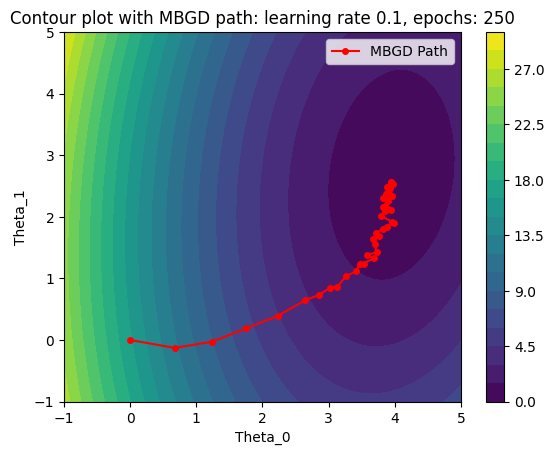

In [335]:
#plotting the contour plot for mini batch gradient descent
def contour_plot_mini_batch(x1, y, t0lim, t1lim, epochs, learning_rate, theta0_history, theta1_history):
    
    # Create meshgrid for theta0 and theta1 values
    theta0 = np.linspace(t0lim[0], t0lim[1], 100)
    theta1 = np.linspace(t1lim[0], t1lim[1], 100)
    t0, t1 = np.meshgrid(theta0, theta1)
    
    # Flatten x1 and y for broadcasting
    x1_flat = x1[np.newaxis, np.newaxis, :]
    y_flat = y[np.newaxis, np.newaxis, :]
    broadcasted_t1 = t1[:, :, np.newaxis]
    broadcasted_t0 = t0[:, :, np.newaxis]
    
    # Compute the predicted y values and the loss (MSE) across the meshgrid
    y_pred = broadcasted_t0 + broadcasted_t1 * x1_flat
    z = np.mean((y_flat - y_pred)**2, axis=-1)

    # Plot the contour
    fig, ax = plt.subplots()
    contour = ax.contourf(t0, t1, z, levels=20)
    plt.colorbar(contour)
    plt.xlabel('Theta_0')
    plt.ylabel('Theta_1')
    plt.title(f'Contour plot with MBGD path: learning rate {learning_rate}, epochs: {epochs}')
    
    # Plot the FBGD path
    path = np.array([theta0_history, theta1_history]).T
    ax.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='MBGD Path')
    plt.legend()
    plt.show()
    
t0lim = [-1,5]
t1lim = [-1,5]
less_FGD, diff_FGD, theta0_history, theta1_history = mini_batch_gradient_descent(x1, y, 250, 0.1, 0.001, 10)
contour_plot_mini_batch(x1, y, t0lim ,t1lim , 250, 0.1, theta0_history, theta1_history)


**Stochastic Gradient Descent**

In [336]:
# Stochastic Gradient Descent Function
def stochastic_gradient_descent(x1, y, epochs, learning_rate, epsilon):
    prev_loss = float('inf')
    flag = False  # flag to check if convergence is achieved
    loss_SGD = []
    diff_SGD = []
    theta0_history=[]
    theta1_history=[]
    # Initializing the parameters
    theta_0 = 0.0
    theta_1 = 0.0
    total_iteration = 0
    for epoch in range(epochs):
        epoch_loss = 0  # To accumulate loss for this epoch
        
        # Shuffle the data at the start of each epoch
        idx = np.random.permutation(len(x1))
        x1_shuffled = x1[idx]
        y_shuffled = y[idx]
        
        for i in range(len(x1)):
            
            total_iteration = (epoch * len(x1) + i)+ 1
            # Pick a data point
            idx = i  # Index for current data point
            y_hat = theta_0 + theta_1 * x1_shuffled[idx]
            
            # Calculate the loss for the current data point
            loss = (y_shuffled[idx] - y_hat) ** 2
            epoch_loss += loss
            
            # Calculate gradients
            grad_theta_0 = -2 * (y_shuffled[idx] - y_hat)
            grad_theta_1 = -2 * (y_shuffled[idx] - y_hat) * x1_shuffled[idx]
            
            theta0_history.append(theta_0)
            theta1_history.append(theta_1)
            # Update parameters
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1
        
        # Average loss for this epoch
        average_epoch_loss = epoch_loss / len(x1)
        loss_SGD.append(average_epoch_loss)
        diff_SGD.append(abs(prev_loss - average_epoch_loss))
        
        # Check if convergence criterion is met
        if abs(prev_loss - average_epoch_loss) < epsilon:
            print(f'SGD Converged at epoch {epoch + 1} and total no. of iterations {total_iteration}')
            flag = True
            break  # Exit the epoch loop
        
        prev_loss = average_epoch_loss

    print(f'Theta_0: {theta_0}, Theta_1: {theta_1} at Epoch {epoch + 1}')
    print(f'Final Loss: {average_epoch_loss}')
    return loss_SGD, diff_SGD, theta0_history, theta1_history

**Plot Loss V/s Epochs**

SGD Converged at epoch 4 and total no. of iterations 160
Theta_0: 3.782987897170415, Theta_1: 2.786224658875872 at Epoch 4
Final Loss: 0.7049069023154195


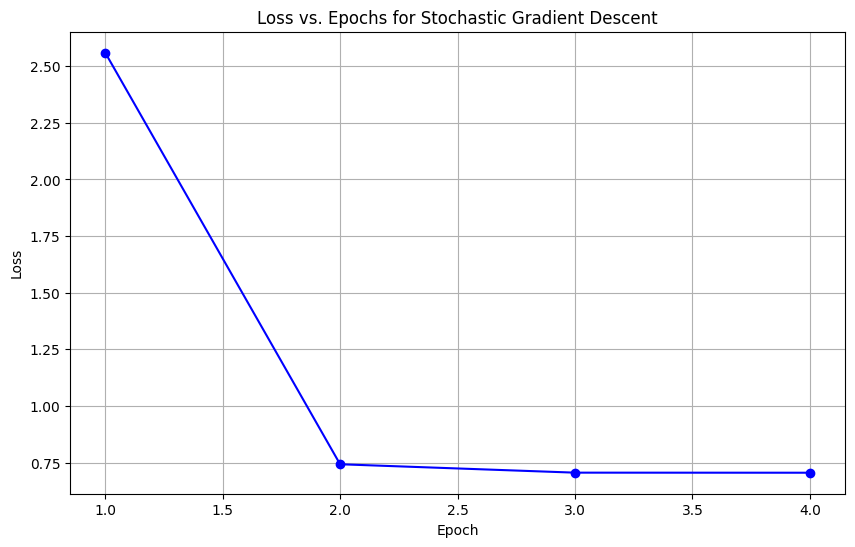

In [342]:
#Train Stochastic Gradient Descent model
loss_SGD, diff_SGD, theta0_history, theta1_history = stochastic_gradient_descent(x1, y, 50, 0.1, 0.001)

# Plot Loss vs. Epochs for Stochastic Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_SGD)+1), loss_SGD, marker='o', linestyle='-', color='Blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Stochastic Gradient Descent')
plt.grid(True)
plt.show()

SGD Converged at epoch 16 and total no. of iterations 640
Theta_0: 3.9294450965131267, Theta_1: 2.617462146048088 at Epoch 16
Final Loss: 0.6122758658708245


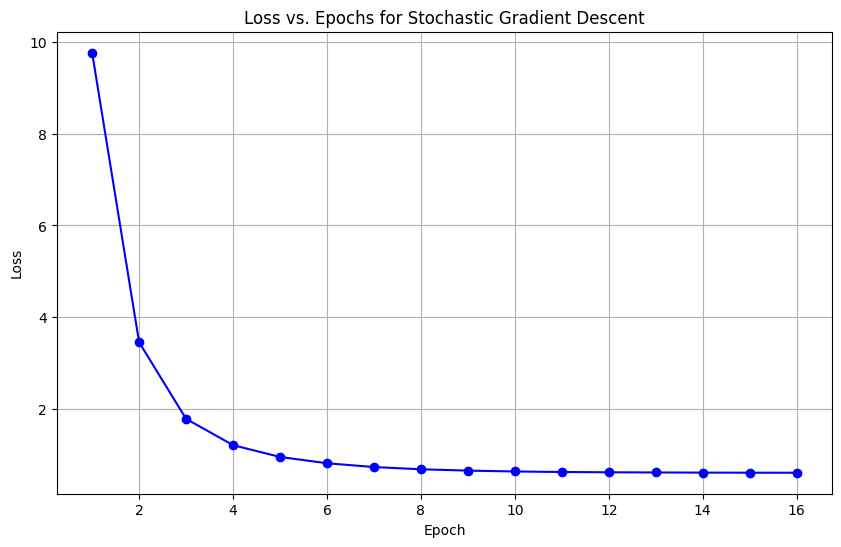

In [343]:
#Train Stochastic Gradient Descent model
loss_SGD, diff_SGD, theta0_history, theta1_history = stochastic_gradient_descent(x1, y, 50, 0.01, 0.001)

# Plot Loss vs. Epochs for Stochastic Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_SGD)+1), loss_SGD, marker='o', linestyle='-', color='Blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Stochastic Gradient Descent')
plt.grid(True)
plt.show()

**Visualize the convergence process for 15 epochs.**

SGD Converged at epoch 3 and total no. of iterations 120
Theta_0: 4.2988552371123, Theta_1: 2.900253540003344 at Epoch 3
Final Loss: 0.6722450451272247


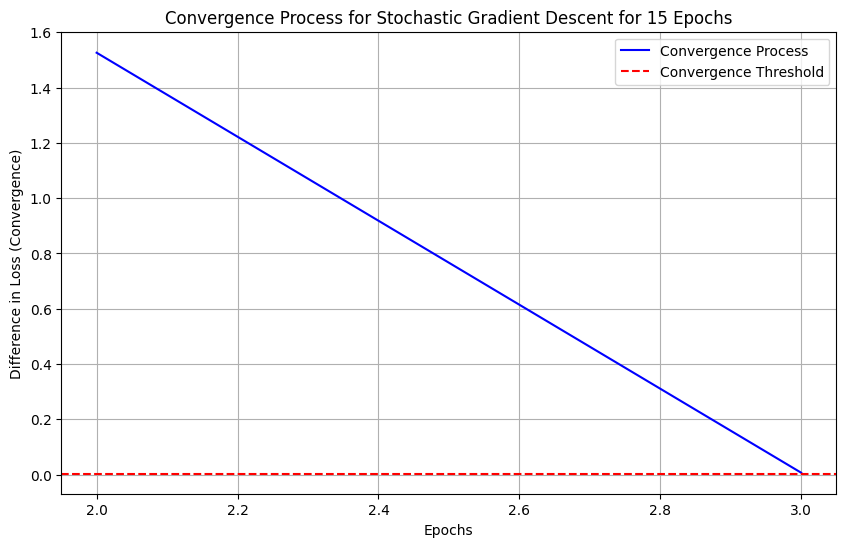

In [344]:
# Running the Stochastic Gradient Descent for 15 epochs
loss_SGD, diff_SGD, theta0_history, theta1_history = stochastic_gradient_descent(x1, y, 15, 0.1, 0.01)

# Plotting Convergence Process vs. Epochs for Stochastic Gradient Descent
plt.figure(figsize=(10,6))
plt.plot(range(1, len(diff_SGD)+1), diff_SGD, label='Convergence Process', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Difference in Loss (Convergence)')
plt.title('Convergence Process for Stochastic Gradient Descent for 15 Epochs')
plt.axhline(y=0.001, color='red', linestyle='--', label='Convergence Threshold')  # Add convergence threshold for visualization
plt.grid(True)
plt.legend()
plt.show()

**Show the contour plots for different epochs for visualisation of optimisation process.**

Theta_0: 4.116622917096885, Theta_1: 3.0329104221016623 at Epoch 50
Final Loss: 0.7319497525418696


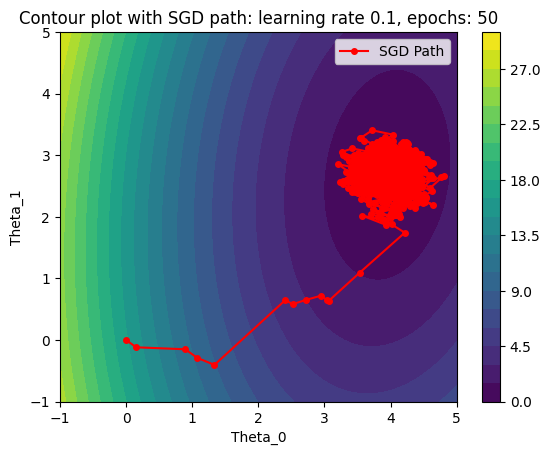

In [350]:
#plotting the contour plot for stochastic gradient descent
def contour_plot_stochastic(x1, y, t0lim, t1lim, epochs, learning_rate, theta0_history, theta1_history):
    
    # Create meshgrid for theta0 and theta1 values
    theta0 = np.linspace(t0lim[0], t0lim[1], 100)
    theta1 = np.linspace(t1lim[0], t1lim[1], 100)
    t0, t1 = np.meshgrid(theta0, theta1)
    
    # Flatten x1 and y for broadcasting
    x1_flat = x1[np.newaxis, np.newaxis, :]
    y_flat = y[np.newaxis, np.newaxis, :]
    broadcasted_t1 = t1[:, :, np.newaxis]
    broadcasted_t0 = t0[:, :, np.newaxis]
    
    # Compute the predicted y values and the loss (MSE) across the meshgrid
    y_pred = broadcasted_t0 + broadcasted_t1 * x1_flat
    z = np.mean((y_flat - y_pred)**2, axis=-1)

    # Plot the contour
    fig, ax = plt.subplots()
    contour = ax.contourf(t0, t1, z, levels=20)
    plt.colorbar(contour)
    plt.xlabel('Theta_0')
    plt.ylabel('Theta_1')
    plt.title(f'Contour plot with SGD path: learning rate {learning_rate}, epochs: {epochs}')
    
    # Plot the FBGD path
    path = np.array([theta0_history, theta1_history]).T
    ax.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='SGD Path')
    plt.legend()
    plt.show()
    
t0lim = [-1,5]
t1lim = [-1,5]

less_SGD, diff_SGD, theta0_history, theta1_history = stochastic_gradient_descent(x1, y, 50, 0.1, 0.001)
contour_plot_stochastic(x1, y, t0lim ,t1lim , 50, 0.1, theta0_history, theta1_history)


SGD Converged at epoch 6 and total no. of iterations 240
Theta_0: 3.898766406200761, Theta_1: 2.7695468790590656 at Epoch 6
Final Loss: 0.7405556108006981


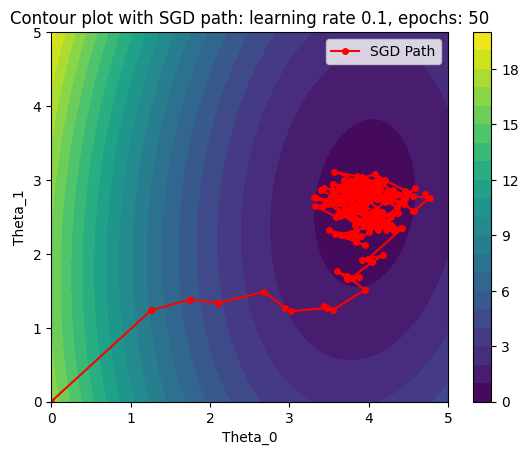

In [352]:
#plotting the contour plot for stochastic gradient descent
def contour_plot__stochastic(x1, y, t0lim, t1lim, epochs, learning_rate, theta0_history, theta1_history):
    
    # Create meshgrid for theta0 and theta1 values
    theta0 = np.linspace(t0lim[0], t0lim[1], 100)
    theta1 = np.linspace(t1lim[0], t1lim[1], 100)
    t0, t1 = np.meshgrid(theta0, theta1)
    
    # Flatten x1 and y for broadcasting
    x1_flat = x1[np.newaxis, np.newaxis, :]
    y_flat = y[np.newaxis, np.newaxis, :]
    broadcasted_t1 = t1[:, :, np.newaxis]
    broadcasted_t0 = t0[:, :, np.newaxis]
    
    # Compute the predicted y values and the loss (MSE) across the meshgrid
    y_pred = broadcasted_t0 + broadcasted_t1 * x1_flat
    z = np.mean((y_flat - y_pred)**2, axis=-1)

    # Plot the contour
    fig, ax = plt.subplots()
    contour = ax.contourf(t0, t1, z, levels=20)
    plt.colorbar(contour)
    plt.xlabel('Theta_0')
    plt.ylabel('Theta_1')
    plt.title(f'Contour plot with SGD path: learning rate {learning_rate}, epochs: {epochs}')
    
    # Plot the FBGD path
    path = np.array([theta0_history, theta1_history]).T
    ax.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='SGD Path')
    plt.legend()
    plt.show()
    
t0lim = [0,5]
t1lim = [0,5]

less_SGD, diff_SGD, theta0_history, theta1_history = stochastic_gradient_descent(x1, y, 50, 0.1, 0.001)
contour_plot_stochastic(x1, y, t0lim ,t1lim , 50, 0.1, theta0_history, theta1_history)


**Calculating the average number of iterations required for Full-Batch gradient descent to get sufficiently close to the optimal solution.**

In [353]:
# Function to calculate average iterations and epochs over multiple trials for FBGD
def calculate_avg_iterations_epochs_FBGD(x1, y, trials, epochs, learning_rate, epsilon):
    iterations_list = []  # To store number of iterations for each trial
    epochs_list = []  # To store number of epochs for each trial
    
    for trial in range(trials):
        print(f"Running trial {trial + 1}/{trials}...")

        # Call FBGD function
        loss_FBGD, diff_FBGD, theta0_history, theta1_history = full_batch_gradient_descent(x1, y, epochs, learning_rate, epsilon)
        
        # Get the total number of epochs from the FBGD function output
        total_iterations = len(loss_FBGD)  # Total iterations = number of epochs for FBGD
        total_epochs = len(loss_FBGD)  # Total epochs = length of loss_FBGD array
        
        # Append results
        iterations_list.append(total_iterations)
        epochs_list.append(total_epochs)
    
    # Calculate averages
    avg_iterations = np.mean(iterations_list)
    avg_epochs = np.mean(epochs_list)
    
    return avg_iterations, avg_epochs

trials = 10  # Number of trials to run
epochs = 1000 # Maximum number of epochs for each trial
learning_rate = 0.01  # Learning rate for FBGD
epsilon = 0.001  # Convergence criterion (epsilon)

# Run multiple trials and calculate the average number of iterations and epochs for FBGD
avg_iterations_FBGD, avg_epochs_FBGD = calculate_avg_iterations_epochs_FBGD(x1, y, trials, epochs, learning_rate, epsilon)

print(f"Average number of iterations to converge (FBGD): {avg_iterations_FBGD}")
print(f"Average number of epochs to converge (FBGD): {avg_epochs_FBGD}")

Running trial 1/10...
Gradient Descent Converged at Epoch 297
Theta_0 is 3.88081002811426 and Theta_1 is 2.178469907817837 at epoch 297
Loss is 0.675879759727649
Running trial 2/10...
Gradient Descent Converged at Epoch 297
Theta_0 is 3.88081002811426 and Theta_1 is 2.178469907817837 at epoch 297
Loss is 0.675879759727649
Running trial 3/10...
Gradient Descent Converged at Epoch 297
Theta_0 is 3.88081002811426 and Theta_1 is 2.178469907817837 at epoch 297
Loss is 0.675879759727649
Running trial 4/10...
Gradient Descent Converged at Epoch 297
Theta_0 is 3.88081002811426 and Theta_1 is 2.178469907817837 at epoch 297
Loss is 0.675879759727649
Running trial 5/10...
Gradient Descent Converged at Epoch 297
Theta_0 is 3.88081002811426 and Theta_1 is 2.178469907817837 at epoch 297
Loss is 0.675879759727649
Running trial 6/10...
Gradient Descent Converged at Epoch 297
Theta_0 is 3.88081002811426 and Theta_1 is 2.178469907817837 at epoch 297
Loss is 0.675879759727649
Running trial 7/10...
Gradie

**Calculating the average number of iterations required for Mini-Batch gradient descent to get sufficiently close to the optimal solution.**

In [354]:
# Function to calculate average iterations and epochs over multiple trials for MBGD
def calculate_avg_iterations_epochs_MBGD(x1, y, trials, epochs, learning_rate, epsilon, batch_size):
    iterations_list = []  # To store the number of iterations for each trial
    epochs_list = []  # To store the number of epochs for each trial

    for trial in range(trials):
        print(f"Running trial {trial + 1}/{trials}...")
        
        # Call MBGD function
        loss_MBGD, diff_MBGD, theta0_history, theta1_history = mini_batch_gradient_descent(x1, y, epochs, learning_rate, epsilon, batch_size)
        
        # Get the total number of iterations and epochs from the MBGD function output
        total_iterations = len(loss_MBGD) * (len(x1) // batch_size)  # Total iterations = number of epochs * number of batches
        total_epochs = len(loss_MBGD)  # Total epochs = length of loss_MBGD array
        
        # Append results
        iterations_list.append(total_iterations)
        epochs_list.append(total_epochs)

    # Calculate averages
    avg_iterations = np.mean(iterations_list)
    avg_epochs = np.mean(epochs_list)

    return avg_iterations, avg_epochs

trials = 10  # Number of trials to run
epochs = 1000  # Maximum number of epochs for each trial
learning_rate = 0.01  # Learning rate for MBGD
epsilon = 0.001  # Convergence criterion (epsilon)
batch_size = 10  # Size of mini-batch

# Run multiple trials and calculate the average number of iterations and epochs for MBGD
avg_iterations_MBGD, avg_epochs_MBGD = calculate_avg_iterations_epochs_MBGD(x1, y, trials, epochs, learning_rate, epsilon, batch_size)

print(f"Average number of iterations to converge (MBGD): {avg_iterations_MBGD}")
print(f"Average number of epochs to converge (MBGD): {avg_epochs_MBGD}")


Running trial 1/10...
Mini-Batch GD Converged at epoch 88 and total no. of iteration 357
Theta_0: 3.9041961547451645, Theta_1: 2.3235259552741634 at Epoch 88
Final Loss: 0.6390455722364121
Running trial 2/10...
Mini-Batch GD Converged at epoch 84 and total no. of iteration 341
Theta_0: 3.898547720017174, Theta_1: 2.2860662246477728 at Epoch 84
Final Loss: 0.6484416285103073
Running trial 3/10...
Mini-Batch GD Converged at epoch 83 and total no. of iteration 337
Theta_0: 3.8968342428901233, Theta_1: 2.2764553229559668 at Epoch 83
Final Loss: 0.65122151372877
Running trial 4/10...
Mini-Batch GD Converged at epoch 88 and total no. of iteration 357
Theta_0: 3.90471454156825, Theta_1: 2.322866937308624 at Epoch 88
Final Loss: 0.6388549558519465
Running trial 5/10...
Mini-Batch GD Converged at epoch 96 and total no. of iteration 389
Theta_0: 3.9127598746666488, Theta_1: 2.3874630317331103 at Epoch 96
Final Loss: 0.6251675051357048
Running trial 6/10...
Mini-Batch GD Converged at epoch 85 and

**Calculating the average number of iterations required for Stochastic gradient descent to get sufficiently close to the optimal solution.**

In [355]:
# Function to calculate average iterations and epochs over multiple trials
def calculate_avg_iterations_epochs(x1, y, trials, epochs, learning_rate, epsilon):
    iterations_list = []  # To store number of iterations for each trial
    epochs_list = []  # To store number of epochs for each trial
    
    for trial in range(trials):
        print(f"Running trial {trial + 1}/{trials}...")
        
        # Call SGD function
        loss_SGD, diff_SGD, theta0_history, theta1_history = stochastic_gradient_descent(x1, y, epochs, learning_rate, epsilon)
        
        # Get the total number of iterations and epochs from the SGD function output
        total_iterations = len(loss_SGD) * len(x1)  # Total iterations = number of epochs * number of data points
        total_epochs = len(loss_SGD)  # Total epochs = length of loss_SGD array
        
        # Append results
        iterations_list.append(total_iterations)
        epochs_list.append(total_epochs)
    
    # Calculate averages
    avg_iterations = np.mean(iterations_list)
    avg_epochs = np.mean(epochs_list)
    
    return avg_iterations, avg_epochs

trials = 10  # Number of trials to run
epochs = 1000  # Maximum number of epochs for each trial
learning_rate = 0.01  # Learning rate for SGD
epsilon = 0.001  # Convergence criterion (epsilon)

# Run multiple trials and calculate the average number of iterations and epochs
avg_iterations, avg_epochs = calculate_avg_iterations_epochs(x1, y, trials, epochs, learning_rate, epsilon)

print(f"Average number of iterations to converge: {avg_iterations}")
print(f"Average number of epochs to converge: {avg_epochs}")


Running trial 1/10...
SGD Converged at epoch 15 and total no. of iterations 600
Theta_0: 3.929859019187235, Theta_1: 2.6065367145441702 at Epoch 15
Final Loss: 0.6138489218025641
Running trial 2/10...
SGD Converged at epoch 19 and total no. of iterations 760
Theta_0: 3.956739380995422, Theta_1: 2.6482966124516794 at Epoch 19
Final Loss: 0.6112513687577217
Running trial 3/10...
SGD Converged at epoch 16 and total no. of iterations 640
Theta_0: 3.938193159682227, Theta_1: 2.6245600850793505 at Epoch 16
Final Loss: 0.6126973112878831
Running trial 4/10...
SGD Converged at epoch 17 and total no. of iterations 680
Theta_0: 3.9307502232488876, Theta_1: 2.6425778630356063 at Epoch 17
Final Loss: 0.6121113757389305
Running trial 5/10...
SGD Converged at epoch 17 and total no. of iterations 680
Theta_0: 3.9521755958528777, Theta_1: 2.636968214283868 at Epoch 17
Final Loss: 0.6116779092498468
Running trial 6/10...
SGD Converged at epoch 14 and total no. of iterations 560
Theta_0: 3.9476009368070

**SGD takes the maximum number of iteratio to converege because it updates the value of parameter after seeing each data point. that means in stochastic gradeint descnet for one epoch we update the value for n times, where n is the number of samples. on the other hand FBGD sees all the data point and then update the parameters. so in one epoch the parameters are updated only once. FBGD will take the largest number of epochs to converge and on the other hand SGD will take the least number of epochs and most number of iterations to converge.**

**QUESTION 4** 

Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an 
ϵ-neighborhood for both dataset. Choose 
ϵ =0.001
. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc.

>0 params: [-0.09528455  1.68856299], MSE: 7.08573
>1 params: [0.08305228 2.24508689], MSE: 4.88806
>2 params: [0.27186469 2.70913882], MSE: 3.46566
>3 params: [0.45975293 3.0558369 ], MSE: 2.62005
>4 params: [0.64136769 3.30117166], MSE: 2.10892
>5 params: [0.81378358 3.4701067 ], MSE: 1.77753
>6 params: [0.97540998 3.58525519], MSE: 1.54402
>7 params: [1.12554024 3.66397567], MSE: 1.36796
>8 params: [1.26407152 3.71856657], MSE: 1.22930
>9 params: [1.39129696 3.75734687], MSE: 1.11740
>10 params: [1.50775087 3.78578289], MSE: 1.02599
>11 params: [1.61409874 3.80740092], MSE: 0.95087
>12 params: [1.71106315 3.82445128], MSE: 0.88896
>13 params: [1.79937621 3.83836366], MSE: 0.83788
>14 params: [1.87975091 3.85004802], MSE: 0.79572


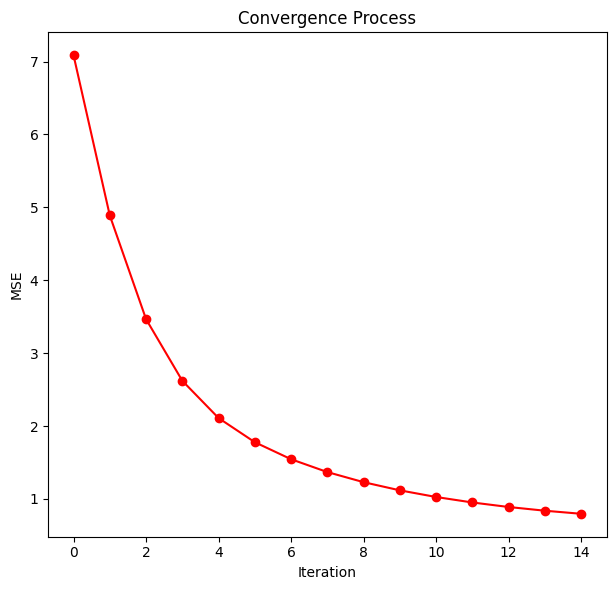

In [356]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Mean Squared Error)
def mse_objective(params, x, y):
    predictions = x.dot(params)
    return np.mean((predictions - y) ** 2)

# Derivative of the objective function (Gradient)
def mse_derivative(params, x, y):
    predictions = x.dot(params)
    return (2 / len(y)) * x.T.dot(predictions - y)

# Gradient descent with momentum
def gradient_descent_momentum(objective, derivative, x, y, n_iter, step_size, momentum):
    # Track all solutions
    solutions, scores = [], []
    # Initialize parameters
    params = np.random.randn(x.shape[1])
    # Initialize change for momentum
    change = np.zeros_like(params)
    # Run the gradient descent
    for i in range(n_iter):
        # Calculate gradient
        gradient = derivative(params, x, y)
        # Calculate update
        new_change = step_size * gradient + momentum * change
        # Update parameters
        params -= new_change
        # Save the change
        change = new_change
        # Evaluate objective function
        score = objective(params, x, y)
        # Store solution and score
        solutions.append(params.copy())
        scores.append(score)
        # Report progress
        print(f'>{i} params: {params}, MSE: {score:.5f}')
    return np.array(solutions), scores

# Seed for reproducibility
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Prepare data for linear regression
X = np.vstack([x1, np.ones(num_samples)]).T  # Adding bias term

# Define parameters
n_iter = 15
step_size = 0.1
momentum = 0.3

# Perform gradient descent with momentum
solutions, scores = gradient_descent_momentum(mse_objective, mse_derivative, X, y, n_iter, step_size, momentum)

# Visualize the convergence process
plt.figure(figsize=(12, 6))

# Plot the convergence process
plt.subplot(1, 2, 2)
plt.plot(scores, marker='o', color='red')
plt.title('Convergence Process')
plt.xlabel('Iteration')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


Observations:

Gradient Descent with Momentum:

The momentum-based gradient descent accelerates the convergence, especially in scenarios where the gradient directions are aligned. 
This method effectively reduces oscillations, allowing for faster convergence compared to vanilla methods.


Vanilla Gradient Descent (Full Batch):

This method converges slower as it relies entirely on the gradient of the full dataset.
It may oscillate or take smaller steps due to the lack of momentum, making it more prone to slower convergence in regions with flat gradients.


Stochastic Gradient Descent:

Stochastic gradient descent (SGD) introduces high variance in the gradient updates due to its random sampling, leading to a noisy path toward convergence.
While it can reach an approximate solution quickly, it might struggle to settle into the optimal 𝜖
ϵ-neighborhood as consistently as momentum-based approaches.

Contour Plot Analysis:

The contour plots visualize the paths taken by each method, showing how the momentum vectors smooth out the updates and direct the descent towards the minimum effectively.
This helps in understanding the dynamic behavior of momentum in optimizing the objective function.

These observations highlight the effectiveness of momentum in accelerating convergence and reducing oscillations, proving advantageous over standard gradient descent variants, particularly

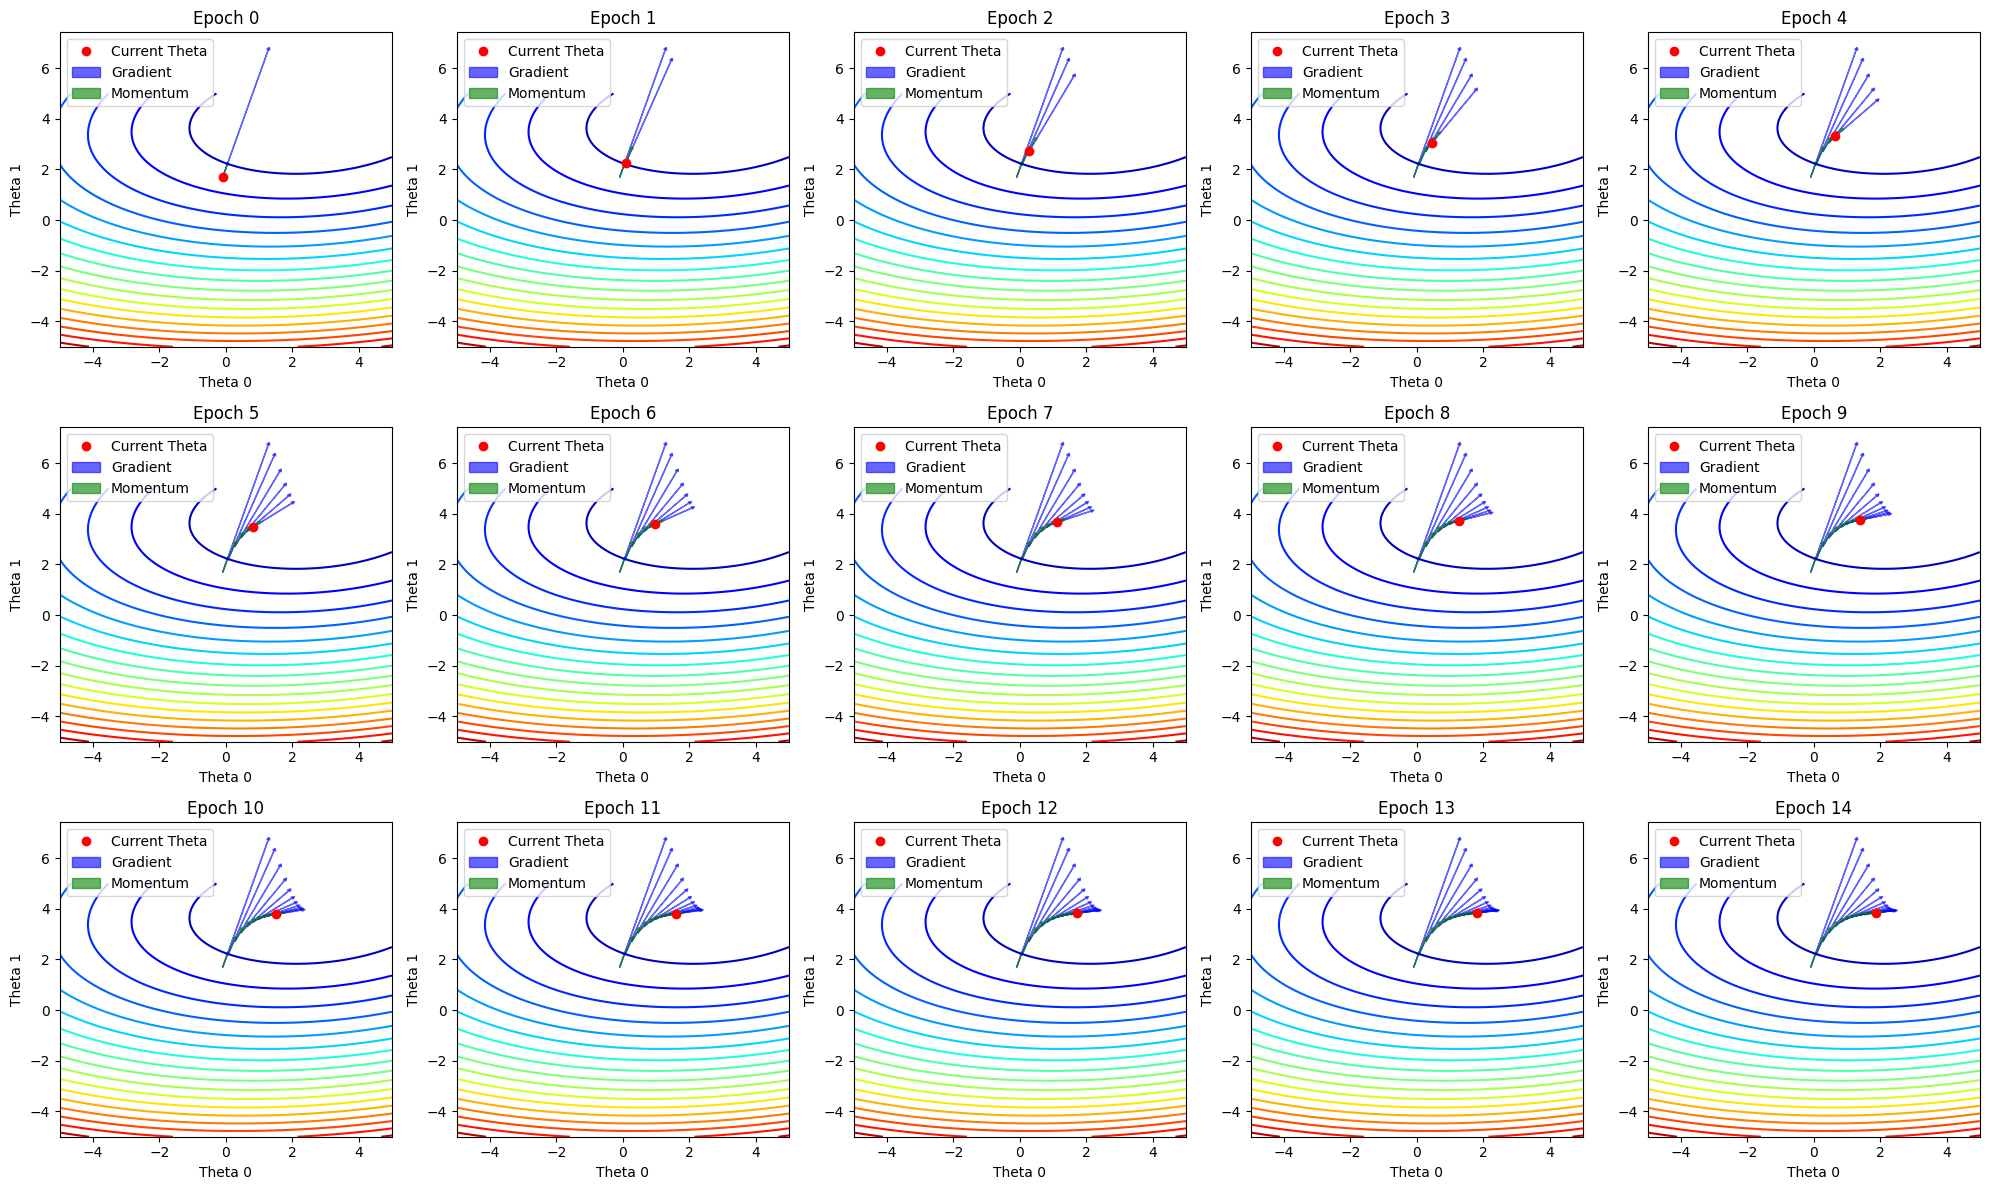

In [270]:
import numpy as np
import matplotlib.pyplot as plt

def mse_objective(params, x, y):
    predictions = x.dot(params)
    return np.mean((predictions - y) ** 2)

def mse_derivative(params, x, y):
    predictions = x.dot(params)
    return (2 / len(y)) * x.T.dot(predictions - y)

def plot_contour(X, y, params, gradients, momenta, epoch, step_size, momentum, ax):
    theta0, theta1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    Z = np.zeros(theta0.shape)
    for i in range(theta0.shape[0]):
        for j in range(theta0.shape[1]):
            theta = np.array([theta0[i, j], theta1[i, j]])
            Z[i, j] = mse_objective(theta, X, y)
    
    ax.contour(theta0, theta1, Z, levels=20, cmap='jet')
    ax.plot(params[0], params[1], 'ro', label='Current Theta')
    
    # Plotting gradients and momenta vectors using ax.arrow
    for i in range(len(gradients)):
        # Gradient arrow
        ax.arrow(epochs[i][0], epochs[i][1], -gradients[i][0], -gradients[i][1],
                 head_width=0.1, head_length=0.1, fc='blue', ec='blue', alpha=0.6, label='Gradient' if i == 0 else "")
        
        # Momentum arrow
        ax.arrow(epochs[i][0], epochs[i][1], -momenta[i][0], -momenta[i][1],
                 head_width=0.1, head_length=0.1, fc='green', ec='green', alpha=0.6, label='Momentum' if i == 0 else "")
    
    ax.set_title(f'Epoch {epoch}')
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.legend()

def gradient_descent_full_batch_momentum(params, objective, derivative, x, y, n_iter, step_size, epsilon, momentum):
    change = np.zeros_like(params)
    gradients = []
    momenta = []
    epochs = []
    
    for i in range(n_iter):
        gradient = derivative(params, x, y)
        new_change = step_size * gradient + momentum * change
        params -= new_change
        change = new_change
        gradients.append(gradient)
        momenta.append(new_change)
        epochs.append(params.copy())
        
        grad_norm = np.linalg.norm(gradient)
        if grad_norm < epsilon:
            break
    
    return params, gradients, momenta, epochs

# Parameters
n_iter = 15
step_size = 0.1
momentum = 0.3
epsilon = 0.001

# Generate synthetic data
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps
X = np.vstack([x1, np.ones(num_samples)]).T

# Initialize parameters
params = np.random.randn(X.shape[1])

# Run gradient descent with momentum
final_params, gradients, momenta, epochs = gradient_descent_full_batch_momentum(params, mse_objective, mse_derivative, X, y, n_iter, step_size, epsilon, momentum)

# Plotting
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

epochs_indices = range(0, len(epochs), max(1, len(epochs)//15))
# Ensure we do not exceed the number of available axes
num_plots = min(len(axes), len(epochs_indices))

for i in range(num_plots):
    epoch = epochs_indices[i]
    ax = axes[i]
    plot_contour(X, y, epochs[epoch], gradients[:epoch+1], momenta[:epoch+1], epoch, step_size, momentum, ax)


plt.tight_layout()
plt.show()


In [403]:
import numpy as np

# Mean Squared Error Objective
def mse_objective(X, y, params):
    predictions = X @ params
    return np.mean((predictions - y) ** 2)

# Mean Squared Error Derivative
def mse_derivative(X, y, params):
    predictions = X @ params
    return (2 / len(y)) * (X.T @ (predictions - y))

# Full Batch Gradient Descent
def gradient_descent_full_batch(params, objective, derivative, X, y, n_iter, step_size, epsilon):
    steps = []
    n_step = 0
    for _ in range(n_iter):
        gradient = derivative(X, y, params)
        params -= step_size * gradient
        steps.append(params.copy())
        n_step += 1
        if np.linalg.norm(gradient) < epsilon:
            break
    return steps, n_step

# Full Batch Gradient Descent with Momentum
def gradient_descent_full_batch_momentum(params, objective, derivative, X, y, n_iter, step_size, epsilon, momentum):
    steps = []
    n_step = 0
    velocity = np.zeros_like(params)
    for _ in range(n_iter):
        gradient = derivative(X, y, params)
        velocity = momentum * velocity - step_size * gradient
        params += velocity
        steps.append(params.copy())
        n_step += 1
        if np.linalg.norm(velocity) < epsilon:
            break
    return steps, n_step

# Parameters
n_iter = 1000
step_size = 0.01
momentum = 0.9
epsilon = 0.001

# Generate synthetic data
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps
X = np.vstack([x1, np.ones(num_samples)]).T

# Initialize parameters for Full Batch Gradient Descent
params_vanilla = np.random.randn(X.shape[1])
params_momentum = params_vanilla.copy()  # Ensure same initialization

# Run Full Batch Gradient Descent methods
steps_vanilla, steps_FBGD = gradient_descent_full_batch(
    params_vanilla, mse_objective, mse_derivative, X, y, n_iter, step_size, epsilon
)
steps_momentum, steps_FBGD_momentum = gradient_descent_full_batch_momentum(
    params_momentum, mse_objective, mse_derivative, X, y, n_iter, step_size, epsilon, momentum
)

print("\n--- Full Batch Gradient Descent ---")
print(f"Vanilla FBGD Steps: {steps_FBGD}")
print(f"Momentum FBGD Steps: {steps_FBGD_momentum}")



--- Full Batch Gradient Descent ---
Vanilla FBGD Steps: 1000
Momentum FBGD Steps: 109


In [2]:
import numpy as np

# Mean Squared Error Objective
def mse_objective(X, y, params):
    predictions = X @ params
    return np.mean((predictions - y) ** 2)

# Mean Squared Error Derivative
def mse_derivative(X, y, params):
    predictions = X @ params
    return (2 / len(y)) * (X.T @ (predictions - y))

# Stochastic Gradient Descent
def stochastic_gradient_descent(params, objective, derivative, X, y, n_iter, step_size, epsilon):
    steps = []
    n_step = 0
    num_samples = len(y)
    for _ in range(n_iter):
        indices = np.random.permutation(num_samples)
        for i in indices:
            gradient = derivative(X[i:i+1], y[i:i+1], params)
            params -= step_size * gradient
        steps.append(params.copy())
        n_step += 1
        if np.linalg.norm(gradient) < epsilon:
            break
    return steps, n_step

# Stochastic Gradient Descent with Momentum
def stochastic_gradient_descent_momentum(params, objective, derivative, X, y, n_iter, step_size, epsilon, momentum):
    steps = []
    n_step = 0
    velocity = np.zeros_like(params)
    num_samples = len(y)
    for _ in range(n_iter):
        indices = np.random.permutation(num_samples)
        for i in indices:
            gradient = derivative(X[i:i+1], y[i:i+1], params)
            velocity = momentum * velocity - step_size * gradient
            params += velocity
        steps.append(params.copy())
        n_step += 1
        if np.linalg.norm(velocity) < epsilon:  # Check norm of velocity for convergence
            break
    return steps, n_step

# Parameters
n_iter = 1000
step_size_vanilla = 0.05
step_size_momentum = 0.01
momentum = 0.95 # Increased momentum value
epsilon = 0.001

# Generate synthetic data
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps
X = np.vstack([x1, np.ones(num_samples)]).T

# Initialize parameters for Stochastic Gradient Descent
params_vanilla_stochastic = np.random.randn(X.shape[1])
params_momentum_stochastic = params_vanilla_stochastic.copy()  # Ensure same initialization

# Run Stochastic Gradient Descent methods
steps_vanilla_stochastic, steps_SGD_batch = stochastic_gradient_descent(
    params_vanilla_stochastic, mse_objective, mse_derivative, X, y, n_iter, step_size_vanilla, epsilon
)
steps_momentum_stochastic, steps_momentum_batch_SGD = stochastic_gradient_descent_momentum(
    params_momentum_stochastic, mse_objective, mse_derivative, X, y, n_iter, step_size_momentum, epsilon, momentum
)

print("\n--- Stochastic Gradient Descent ---")
print(f"Vanilla SGD Steps: {steps_SGD_batch}")
print(f"Momentum SGD Steps: {steps_momentum_batch_SGD}")



--- Stochastic Gradient Descent ---
Vanilla SGD Steps: 800
Momentum SGD Steps: 1000
